# Visuals of Torch and Custom Model

In [1]:
import train as custom_model
import CNN_torch as torch_model
import visuals
import glob

# load data
# 1. Train Custom Model
print(">>> Running Custom Framework...")
custom_log_path = custom_model.train(
    optimizer_type="Adam",
    log_name="benchmark_run",
    num_epochs=5,
    batch_size=64,
    lr=0.001
)

# 2. Train Torch Model
print(">>> Running PyTorch Framework...")
torch_log_path = torch_model.train_torch(
    optimizer_type="Adam",
    log_name="benchmark_run",
    num_epochs=5,
    batch_size=64,
    lr=0.001
)

>>> Running Custom Framework...
[INFO] Training Start | Optimizer: Adam | Epochs: 5
[INFO] Training log saved to: ./logs/benchmark_run_k3_c8_h128_Adam_lr0.001_20251206_214003.json
>>> Running PyTorch Framework...
[INFO-TORCH] Training Start | Opt: Adam | Device: cpu
Training log saved to: ./logs/benchmark_run_k3_c8_h128_Adam_lr0.001_20251206_214111.json


## 1. Basic Comparison: Loss & Accuracy Curves


>>> Generating Comparison Plots...


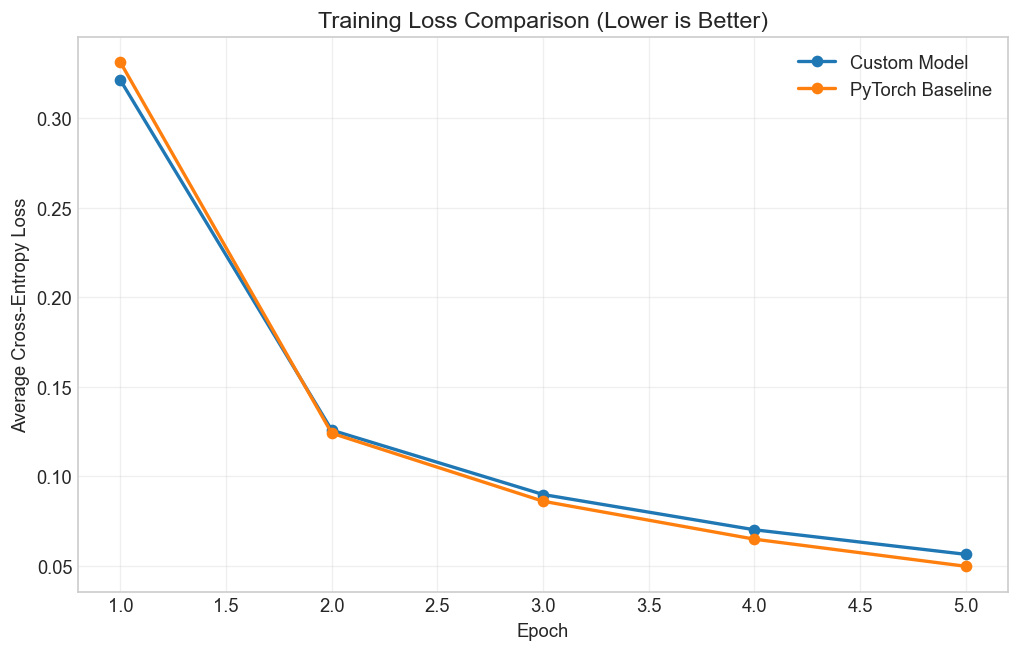

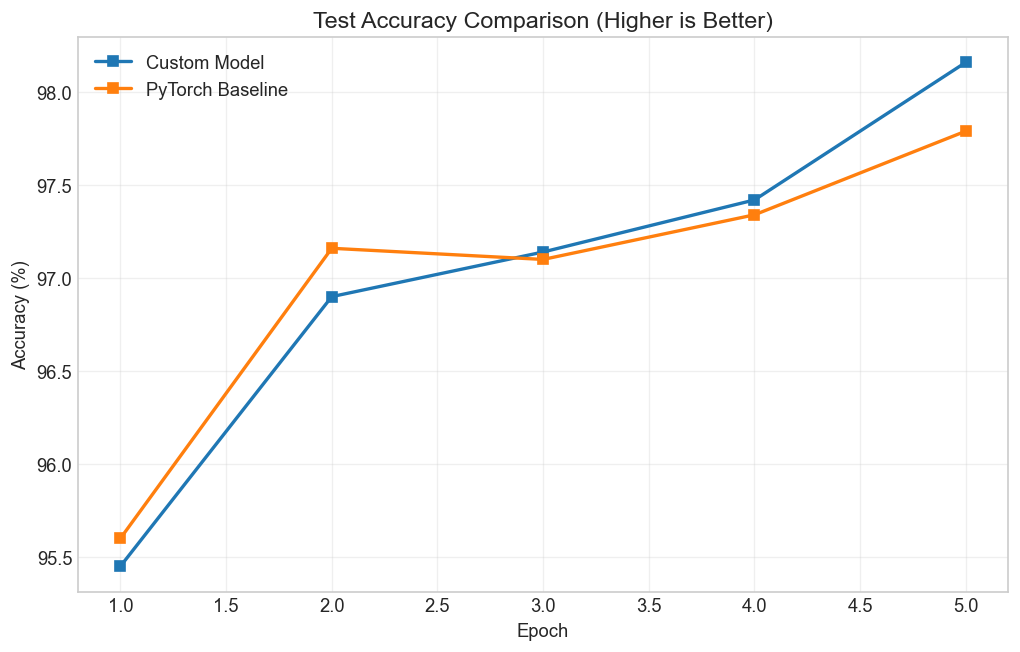

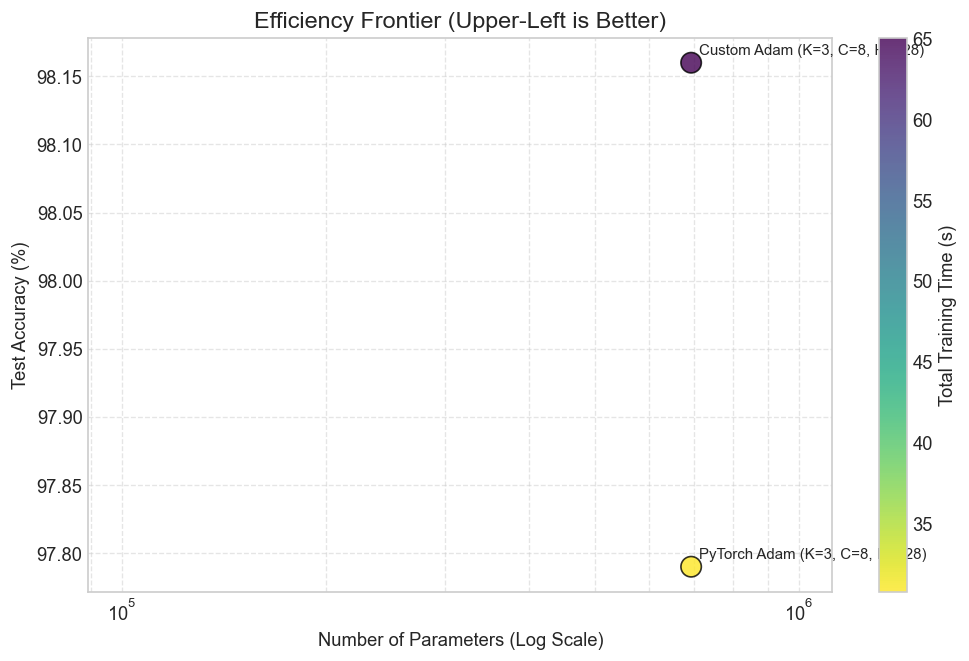

In [2]:
print("\n>>> Generating Comparison Plots...")
visuals.plot_loss_comparison(custom=custom_log_path, torch=torch_log_path)
visuals.plot_accuracy_comparison(custom=custom_log_path, torch=torch_log_path)
visuals.plot_efficiency_frontier([custom_log_path, torch_log_path])

## 2. Gradient Norms Comparison


>>> Deep Diagnostics: Gradient Norm (Stability Check)


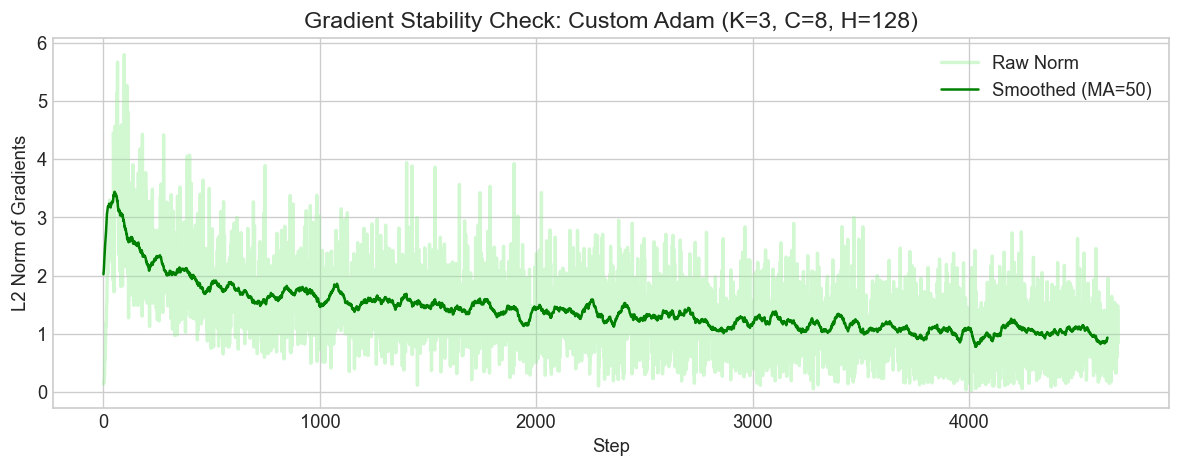

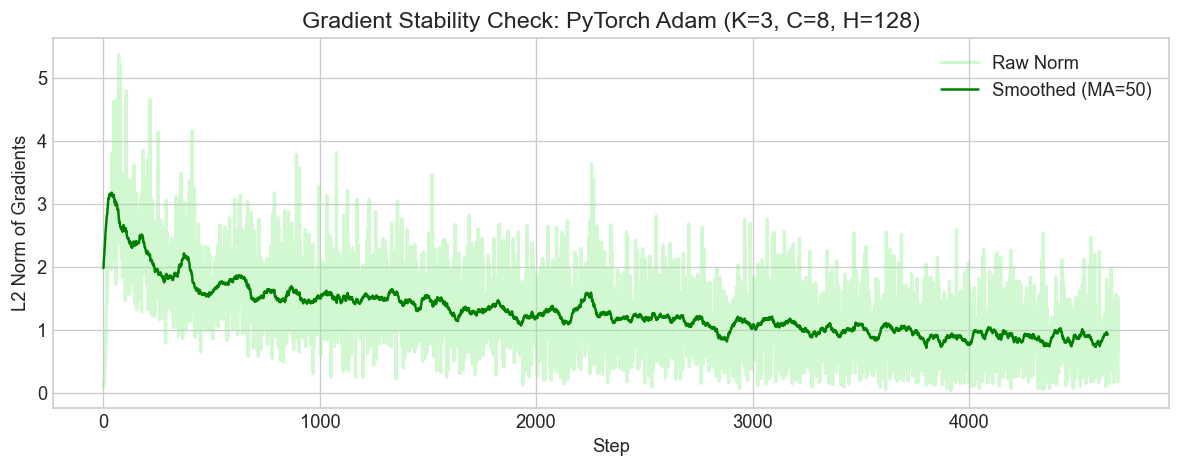

In [3]:
print("\n>>> Deep Diagnostics: Gradient Norm (Stability Check)")
visuals.plot_gradient_norm(custom_log_path)
visuals.plot_gradient_norm(torch_log_path)

## 3. Detailed Training Dynamics Analysis


>>> 2. Detailed Training Dynamics (Step-level Loss)


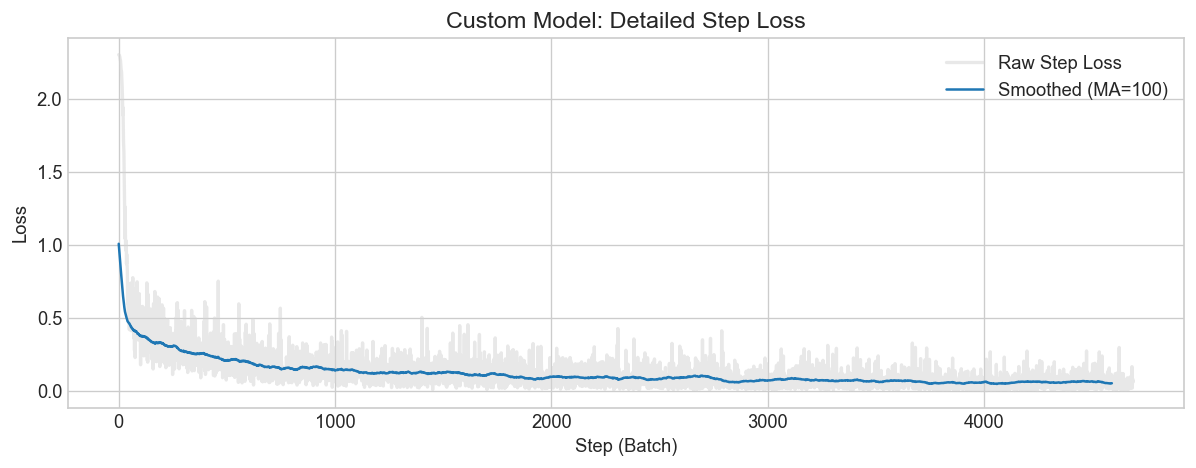

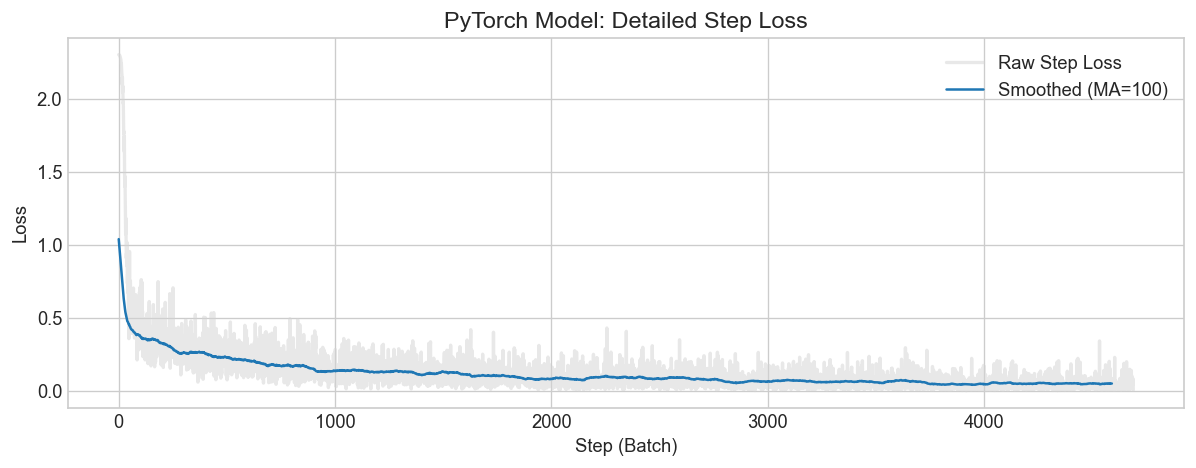

In [4]:
print("\n>>> 2. Detailed Training Dynamics (Step-level Loss)")
visuals.plot_detailed_loss(custom_log_path, window=100, title="Custom Model: Detailed Step Loss")
visuals.plot_detailed_loss(torch_log_path, window=100, title="PyTorch Model: Detailed Step Loss")

## 4. Conclusion Matrix Visualization


>>> 3. Error Analysis: Confusion Matrix


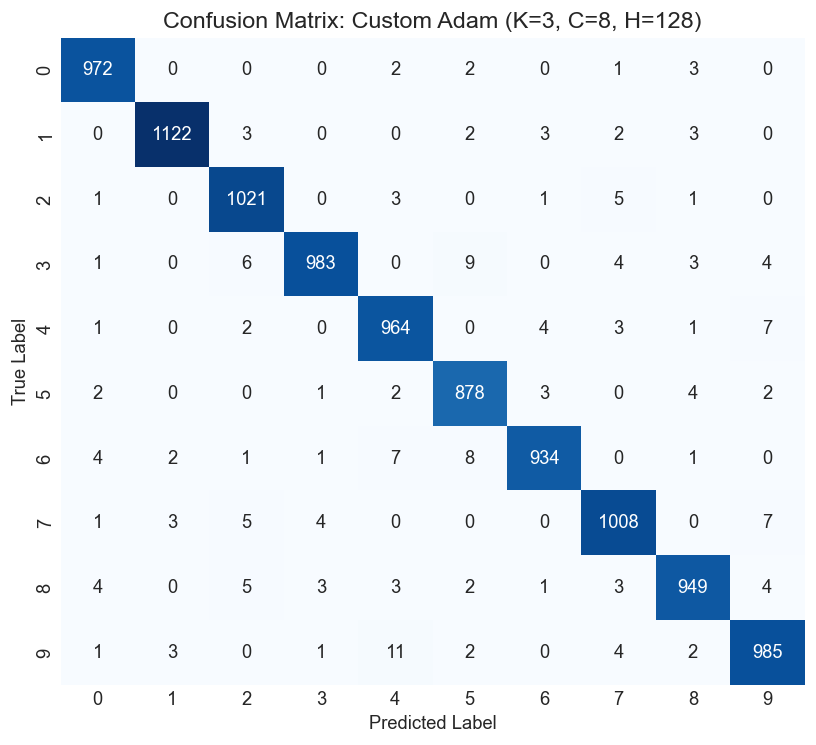

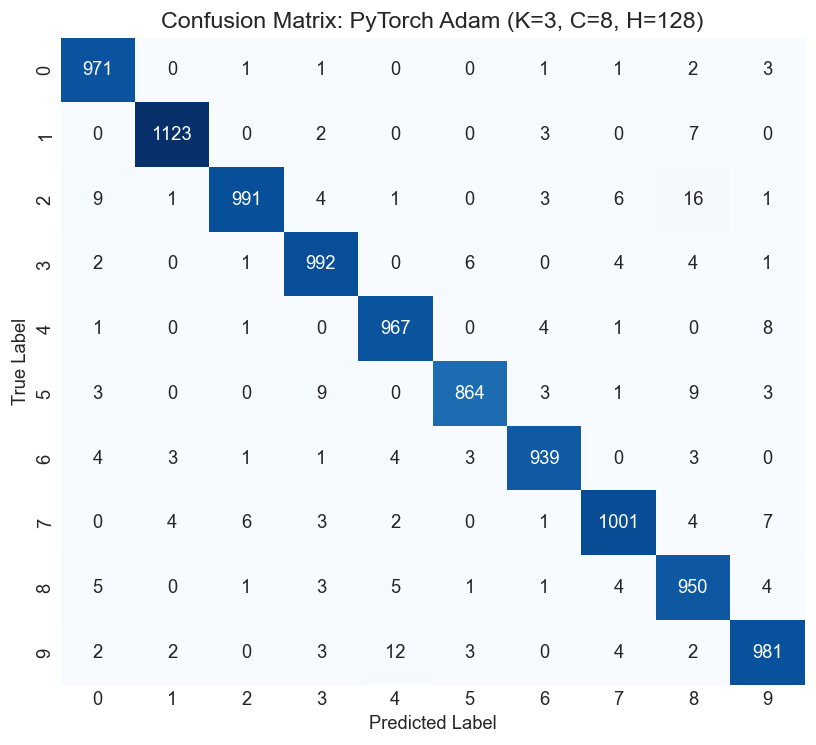

In [5]:
print("\n>>> 3. Error Analysis: Confusion Matrix")
visuals.plot_confusion_matrix(custom_log_path)
visuals.plot_confusion_matrix(torch_log_path)

## 5. Time & Memory Efficiency Comparison

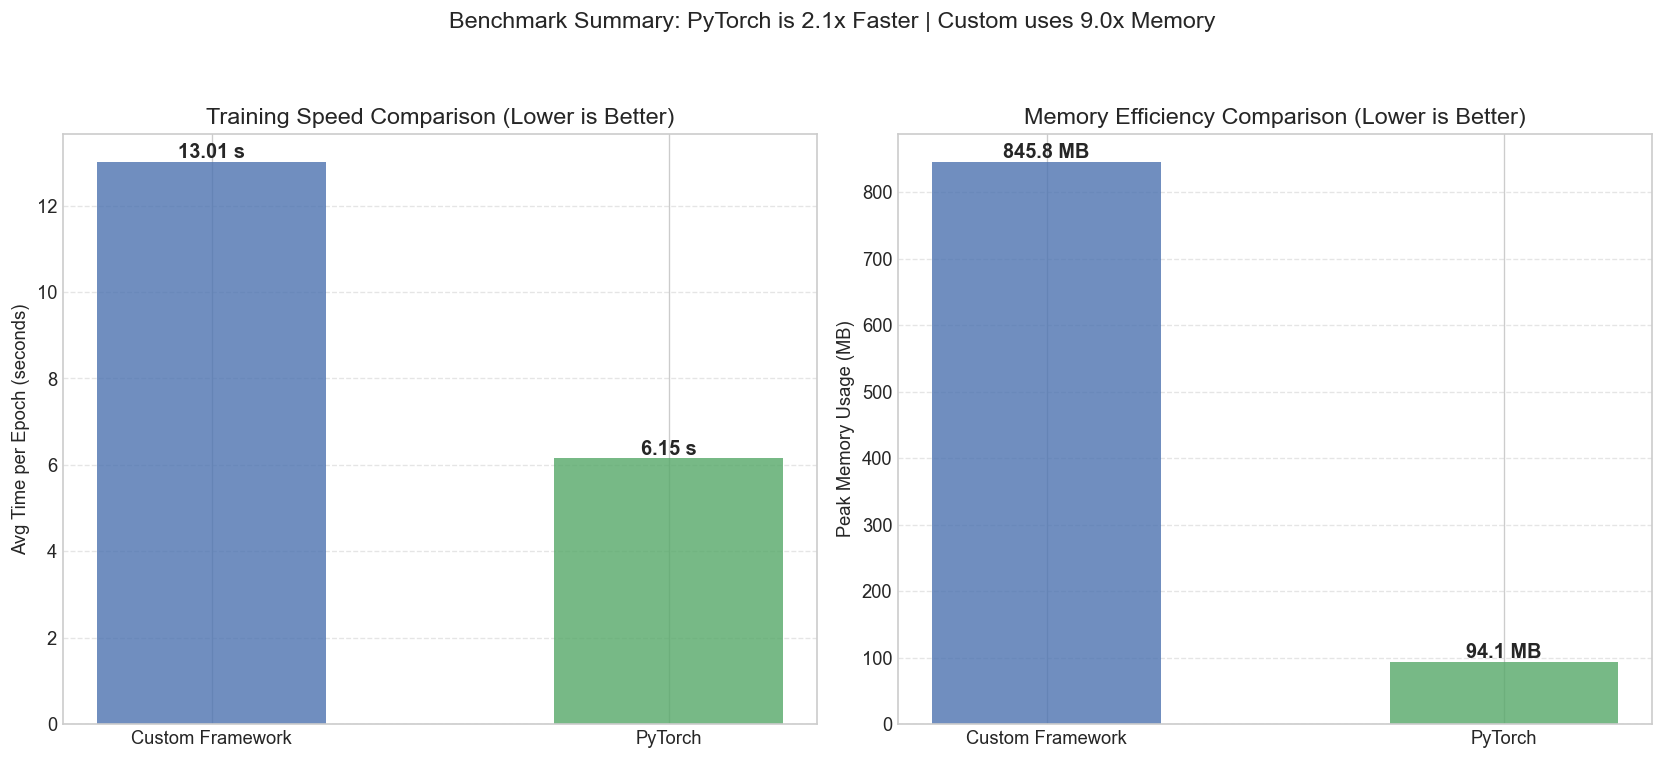

In [6]:
visuals.plot_system_benchmark(custom_log_path, torch_log_path)